Capstone 2 EDA: Mortality & life expectancy


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline
import seaborn as sns   
from pivottablejs import pivot_ui



# from sklearn._ import
# from scipy.stats import 
# import statsmodels.api as sm


In [3]:
weekly = pd.read_csv('data/Weekly_Counts_of_Deaths_by_State_and_Select_Causes__2014-2019.csv')

In [4]:
weekly.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16902 entries, 0 to 16901
Data columns (total 30 columns):
 #   Column                                                                                             Non-Null Count  Dtype  
---  ------                                                                                             --------------  -----  
 0   Jurisdiction of Occurrence                                                                         16902 non-null  object 
 1   MMWR Year                                                                                          16902 non-null  int64  
 2   MMWR Week                                                                                          16902 non-null  int64  
 3   Week Ending Date                                                                                   16902 non-null  object 
 4   All  Cause                                                                                         16902 non-null  int

In [5]:
top_five = pd.read_csv('data/NCHS_-_Top_Five_Leading_Causes_of_Death__United_States__1990__1950__2000.csv')

In [6]:
top_five.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Year              15 non-null     int64 
 1   Cause             15 non-null     object
 2   Number of Deaths  15 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 488.0+ bytes


In [7]:
top_five_by_yr = top_five.groupby(by='Year')

In [8]:
top_five_by_yr.head()

,Year,Cause,Number of Deaths
0,2000,Heart Disease,710760
1,2000,Cancer,553091
2,2000,Stroke,167661
3,2000,Chronic Respiratory Diseases,122009
4,2000,Accidents,97900
5,1950,Heart Disease,535705
6,1950,Cancer,210733
7,1950,Vascular Lesions,156751
8,1950,Accidents,91249
9,1950,Certain Diseases of Infancy,60989


In [9]:
top_five_1900 = top_five.loc[top_five['Year'] == 1900]

In [10]:
top_five_1950 = top_five.loc[top_five['Year'] == 1950]

In [11]:
top_five_2000 = top_five.loc[top_five['Year'] == 2000]

In [12]:
def show_values_on_bars(axs):
    def _show_on_single_plot(ax):        
        for p in ax.patches:
            _x = p.get_x() + p.get_width() / 2
            _y = p.get_y() + p.get_height()
            value = '{:.0f}'.format(p.get_height())
            ax.text(_x, _y, value, ha="center") 

    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _show_on_single_plot(ax)
    else:
        _show_on_single_plot(axs)

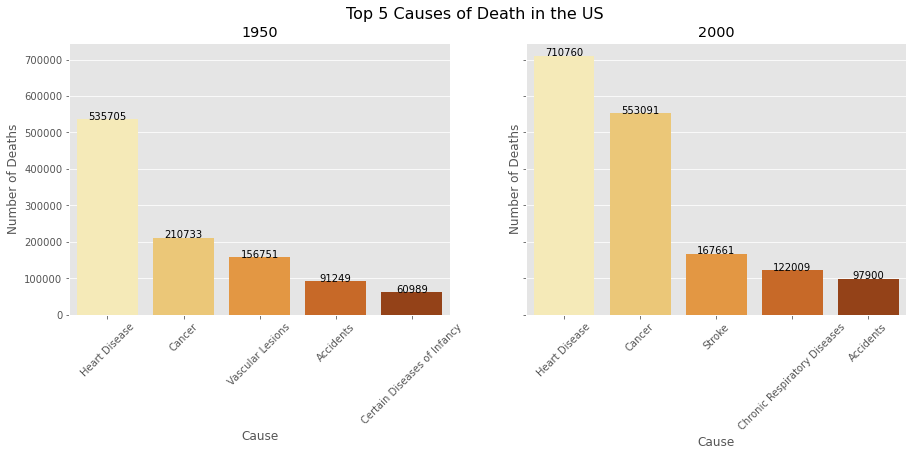

In [13]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize = (15, 5), sharey=True)
sns.barplot(x = 'Cause', y='Number of Deaths', data=top_five_1950, ax=ax[0], palette='YlOrBr')
sns.barplot(x = 'Cause', y='Number of Deaths', data=top_five_2000, ax=ax[1], palette='YlOrBr')
plt.suptitle('Top 5 Causes of Death in the US', fontsize=16)
ax[0].set_title("1950")
ax[1].set_title("2000")
ax[0].tick_params(axis='x', rotation=45)
ax[1].tick_params(axis='x', rotation=45)
show_values_on_bars(ax[0])
show_values_on_bars(ax[1]);

In [14]:
weekly.drop(weekly.columns[17:], axis =1, inplace=True)

In [15]:
weekly.head(20)

,Jurisdiction of Occurrence,MMWR Year,MMWR Week,Week Ending Date,All Cause,Natural Cause,Septicemia (A40-A41),Malignant neoplasms (C00-C97),Diabetes mellitus (E10-E14),Alzheimer disease (G30),Influenza and pneumonia (J10-J18),Chronic lower respiratory diseases (J40-J47),"Other diseases of respiratory system (J00-J06,J30-J39,J67,J70-J98)","Nephritis, nephrotic syndrome and nephrosis (N00-N07,N17-N19,N25-N27)","Symptoms, signs and abnormal clinical and laboratory findings, not elsewhere classified (R00-R99)","Diseases of heart (I00-I09,I11,I13,I20-I51)",Cerebrovascular diseases (I60-I69)
0,United States,2014,1,01/04/2014,54065,50189,882.0,11244.0,1654.0,1780.0,1639.0,3331.0,756.0,965.0,679.0,13166.0,2669.0
1,United States,2014,2,01/11/2014,56353,52450,905.0,11504.0,1735.0,1917.0,1910.0,3444.0,845.0,1098.0,665.0,13663.0,2738.0
2,United States,2014,3,01/18/2014,54769,51043,919.0,11496.0,1660.0,1914.0,1920.0,3333.0,812.0,1056.0,598.0,12928.0,2714.0
3,United States,2014,4,01/25/2014,54223,50560,845.0,11629.0,1602.0,1862.0,1765.0,3467.0,753.0,1029.0,622.0,12813.0,2720.0
4,United States,2014,5,02/01/2014,54074,50402,890.0,11584.0,1586.0,1867.0,1642.0,3283.0,720.0,998.0,664.0,12896.0,2699.0
5,United States,2014,6,02/08/2014,53484,49790,849.0,11355.0,1643.0,1873.0,1528.0,3351.0,728.0,1038.0,641.0,12681.0,2684.0
6,United States,2014,7,02/15/2014,53910,50175,851.0,11477.0,1642.0,1843.0,1472.0,3303.0,739.0,1021.0,638.0,12984.0,2669.0
7,United States,2014,8,02/22/2014,52752,49010,708.0,11478.0,1564.0,1814.0,1269.0,3047.0,731.0,973.0,643.0,12577.0,2799.0
8,United States,2014,9,03/01/2014,51768,47907,779.0,11251.0,1588.0,1776.0,1228.0,3008.0,687.0,1018.0,595.0,12248.0,2630.0
9,United States,2014,10,03/08/2014,52163,48353,777.0,11535.0,1536.0,1830.0,1215.0,3043.0,760.0,1040.0,642.0,12318.0,2529.0


In [21]:
weekly['Week Ending Date'] = pd.to_datetime(weekly['Week Ending Date'], format='%m/%d/%Y')

In [20]:
weekly.corr()

,MMWR Year,MMWR Week,All Cause,Natural Cause,Septicemia (A40-A41),Malignant neoplasms (C00-C97),Diabetes mellitus (E10-E14),Alzheimer disease (G30),Influenza and pneumonia (J10-J18),Chronic lower respiratory diseases (J40-J47),"Other diseases of respiratory system (J00-J06,J30-J39,J67,J70-J98)","Nephritis, nephrotic syndrome and nephrosis (N00-N07,N17-N19,N25-N27)","Symptoms, signs and abnormal clinical and laboratory findings, not elsewhere classified (R00-R99)","Diseases of heart (I00-I09,I11,I13,I20-I51)",Cerebrovascular diseases (I60-I69)
MMWR Year,1.000000,-0.008189,0.007722,0.006593,-0.000387,0.001149,0.009804,0.016576,-0.002551,0.005023,0.017253,0.006263,-0.004488,0.006238,0.009536
MMWR Week,-0.008189,1.000000,-0.006694,-0.007558,-0.008952,-0.000578,-0.008108,-0.003384,-0.046878,-0.020026,-0.010111,-0.007626,0.009855,-0.008830,-0.003344
All Cause,0.007722,-0.006694,1.000000,0.999957,0.994111,0.998287,0.998210,0.994717,0.944752,0.996219,0.996365,0.997956,0.992544,0.999652,0.999085
Natural Cause,0.006593,-0.007558,0.999957,1.000000,0.994421,0.998019,0.998255,0.994639,0.946902,0.996653,0.996343,0.998115,0.992447,0.999767,0.999013
Septicemia (A40-A41),-0.000387,-0.008952,0.994111,0.994421,1.000000,0.990717,0.991117,0.986337,0.950569,0.993161,0.992714,0.995550,0.990996,0.994337,0.991712
Malignant neoplasms (C00-C97),0.001149,-0.000578,0.998287,0.998019,0.990717,1.000000,0.995134,0.990126,0.929320,0.991049,0.991751,0.995146,0.991754,0.997314,0.997158
Diabetes mellitus (E10-E14),0.009804,-0.008108,0.998210,0.998255,0.991117,0.995134,1.000000,0.995234,0.946009,0.995042,0.995420,0.996102,0.989327,0.998000,0.997704
Alzheimer disease (G30),0.016576,-0.003384,0.994717,0.994639,0.986337,0.990126,0.995234,1.000000,0.945080,0.991628,0.992677,0.991991,0.984058,0.994018,0.995614
Influenza and pneumonia (J10-J18),-0.002551,-0.046878,0.944752,0.946902,0.950569,0.929320,0.946009,0.945080,1.000000,0.962131,0.946908,0.947399,0.927820,0.948512,0.941286
Chronic lower respiratory diseases (J40-J47),0.005023,-0.020026,0.996219,0.996653,0.993161,0.991049,0.995042,0.991628,0.962131,1.000000,0.994846,0.995651,0.986521,0.996928,0.994750


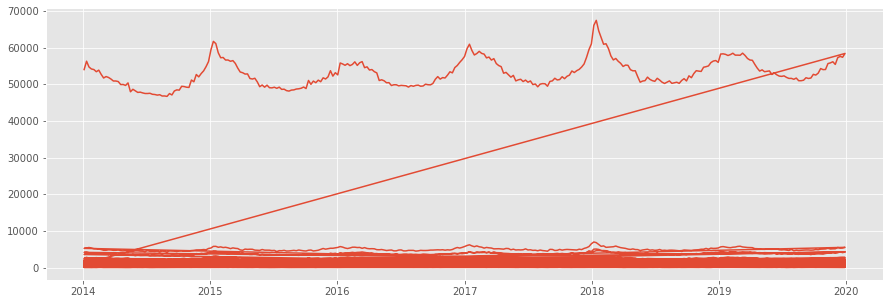

In [22]:
fig, ax = plt.subplots(figsize=(15, 5))
ax = plt.plot(weekly['Week Ending Date'], weekly['All  Cause']);

In [25]:
weekly['MMWR Year'].value_counts(normalize=True)

2014    0.169329
2016    0.166134
2017    0.166134
2018    0.166134
2019    0.166134
2015    0.166134
Name: MMWR Year, dtype: float64

In [26]:
weekly['Accidental'] = weekly['All  Cause'] - weekly['Natural Cause']

In [27]:
weekly_grp = weekly.groupby(by='MMWR Year')

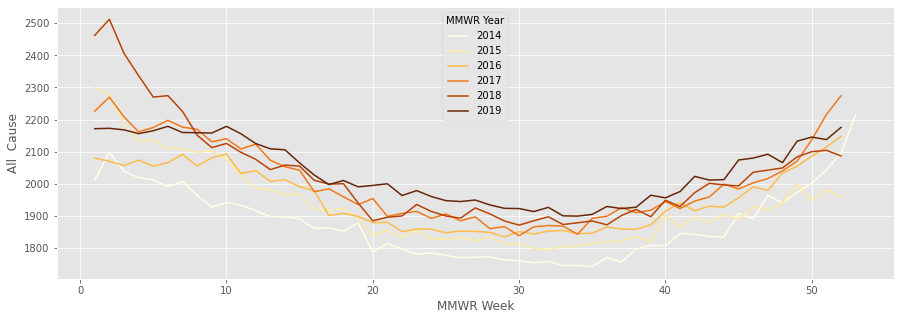

In [28]:
fig, ax = plt.subplots(figsize = (15, 5))
sns.lineplot(x = 'MMWR Week', y='All  Cause', data=weekly, hue = 'MMWR Year', palette='YlOrBr', ci=None);


In [29]:
weekly_2014 = weekly.loc[weekly['MMWR Year'] == 2014]
weekly_2015 = weekly.loc[weekly['MMWR Year'] == 2015]
weekly_2016 = weekly.loc[weekly['MMWR Year'] == 2016]
weekly_2017 = weekly.loc[weekly['MMWR Year'] == 2017]
weekly_2018 = weekly.loc[weekly['MMWR Year'] == 2018]
weekly_2019 = weekly.loc[weekly['MMWR Year'] == 2019]


In [30]:
piv = weekly.pivot_table(['Septicemia (A40-A41)', 'Malignant neoplasms (C00-C97)', 'Diabetes mellitus (E10-E14)', 
                   'Alzheimer disease (G30)', 'Influenza and pneumonia (J10-J18)', 'Chronic lower respiratory diseases (J40-J47)', 
                   'Other diseases of respiratory system (J00-J06,J30-J39,J67,J70-J98)', 'Nephritis, nephrotic syndrome and nephrosis (N00-N07,N17-N19,N25-N27)', 
                   'Symptoms, signs and abnormal clinical and laboratory findings, not elsewhere classified (R00-R99)', 
                    'Diseases of heart (I00-I09,I11,I13,I20-I51)', 'Cerebrovascular diseases (I60-I69)', 
                   'Accidental'], 'MMWR Year', aggfunc='sum')


In [31]:
piv

,Accidental,Alzheimer disease (G30),Cerebrovascular diseases (I60-I69),Chronic lower respiratory diseases (J40-J47),Diabetes mellitus (E10-E14),"Diseases of heart (I00-I09,I11,I13,I20-I51)",Influenza and pneumonia (J10-J18),Malignant neoplasms (C00-C97),"Nephritis, nephrotic syndrome and nephrosis (N00-N07,N17-N19,N25-N27)","Other diseases of respiratory system (J00-J06,J30-J39,J67,J70-J98)",Septicemia (A40-A41),"Symptoms, signs and abnormal clinical and laboratory findings, not elsewhere classified (R00-R99)"
MMWR Year,,,,,,,,,,,,
2014,413646,189004.0,269728.0,299076.0,155784.0,1257794.0,110096.0,1208589.0,94176.0,68505.0,75465.0,59845.0
2015,433965,219499.0,278423.0,307435.0,157680.0,1267276.0,108671.0,1193051.0,95401.0,71178.0,76812.0,58417.0
2016,469611,230032.0,281465.0,306285.0,158981.0,1268360.0,98419.0,1194760.0,95356.0,73113.0,76302.0,61011.0
2017,495629,241348.0,290744.0,318331.0,166445.0,1296069.0,106945.0,1200098.0,96617.0,78204.0,77366.0,60518.0
2018,491033,242958.0,293855.0,317268.0,169221.0,1312666.0,114095.0,1200375.0,98520.0,82519.0,76854.0,59971.0
2019,503274,241716.0,297763.0,312172.0,174750.0,1319073.0,94892.0,1201211.0,98728.0,83094.0,72294.0,59420.0


In [32]:
results = piv.sum(axis=0).iloc[:-1].sort_values(ascending=False)
results

Diseases of heart (I00-I09,I11,I13,I20-I51)                              7721238.0
Malignant neoplasms (C00-C97)                                            7198084.0
Accidental                                                               2807158.0
Chronic lower respiratory diseases (J40-J47)                             1860567.0
Cerebrovascular diseases (I60-I69)                                       1711978.0
Alzheimer disease (G30)                                                  1364557.0
Diabetes mellitus (E10-E14)                                               982861.0
Influenza and pneumonia (J10-J18)                                         633118.0
Nephritis, nephrotic syndrome and nephrosis (N00-N07,N17-N19,N25-N27)     578798.0
Other diseases of respiratory system (J00-J06,J30-J39,J67,J70-J98)        456613.0
Septicemia (A40-A41)                                                      455093.0
dtype: float64

In [33]:
piv

,Accidental,Alzheimer disease (G30),Cerebrovascular diseases (I60-I69),Chronic lower respiratory diseases (J40-J47),Diabetes mellitus (E10-E14),"Diseases of heart (I00-I09,I11,I13,I20-I51)",Influenza and pneumonia (J10-J18),Malignant neoplasms (C00-C97),"Nephritis, nephrotic syndrome and nephrosis (N00-N07,N17-N19,N25-N27)","Other diseases of respiratory system (J00-J06,J30-J39,J67,J70-J98)",Septicemia (A40-A41),"Symptoms, signs and abnormal clinical and laboratory findings, not elsewhere classified (R00-R99)"
MMWR Year,,,,,,,,,,,,
2014,413646,189004.0,269728.0,299076.0,155784.0,1257794.0,110096.0,1208589.0,94176.0,68505.0,75465.0,59845.0
2015,433965,219499.0,278423.0,307435.0,157680.0,1267276.0,108671.0,1193051.0,95401.0,71178.0,76812.0,58417.0
2016,469611,230032.0,281465.0,306285.0,158981.0,1268360.0,98419.0,1194760.0,95356.0,73113.0,76302.0,61011.0
2017,495629,241348.0,290744.0,318331.0,166445.0,1296069.0,106945.0,1200098.0,96617.0,78204.0,77366.0,60518.0
2018,491033,242958.0,293855.0,317268.0,169221.0,1312666.0,114095.0,1200375.0,98520.0,82519.0,76854.0,59971.0
2019,503274,241716.0,297763.0,312172.0,174750.0,1319073.0,94892.0,1201211.0,98728.0,83094.0,72294.0,59420.0


In [256]:
weekly

,Jurisdiction of Occurrence,MMWR Year,MMWR Week,Week Ending Date,All Cause,Natural Cause,Septicemia (A40-A41),Malignant neoplasms (C00-C97),Diabetes mellitus (E10-E14),Alzheimer disease (G30),Influenza and pneumonia (J10-J18),Chronic lower respiratory diseases (J40-J47),"Other diseases of respiratory system (J00-J06,J30-J39,J67,J70-J98)","Nephritis, nephrotic syndrome and nephrosis (N00-N07,N17-N19,N25-N27)","Symptoms, signs and abnormal clinical and laboratory findings, not elsewhere classified (R00-R99)","Diseases of heart (I00-I09,I11,I13,I20-I51)",Cerebrovascular diseases (I60-I69),Accidental
0,United States,2014,1,2014-01-04,54065,50189,882.0,11244.0,1654.0,1780.0,1639.0,3331.0,756.0,965.0,679.0,13166.0,2669.0,3876
1,United States,2014,2,2014-01-11,56353,52450,905.0,11504.0,1735.0,1917.0,1910.0,3444.0,845.0,1098.0,665.0,13663.0,2738.0,3903
2,United States,2014,3,2014-01-18,54769,51043,919.0,11496.0,1660.0,1914.0,1920.0,3333.0,812.0,1056.0,598.0,12928.0,2714.0,3726
3,United States,2014,4,2014-01-25,54223,50560,845.0,11629.0,1602.0,1862.0,1765.0,3467.0,753.0,1029.0,622.0,12813.0,2720.0,3663
4,United States,2014,5,2014-02-01,54074,50402,890.0,11584.0,1586.0,1867.0,1642.0,3283.0,720.0,998.0,664.0,12896.0,2699.0,3672
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16897,Puerto Rico,2019,48,2019-11-30,619,568,NaN,113.0,62.0,53.0,12.0,28.0,NaN,25.0,19.0,91.0,27.0,51
16898,Puerto Rico,2019,49,2019-12-07,555,530,15.0,109.0,62.0,46.0,NaN,26.0,NaN,16.0,14.0,91.0,23.0,25
16899,Puerto Rico,2019,50,2019-12-14,526,492,NaN,91.0,56.0,39.0,15.0,21.0,NaN,16.0,16.0,85.0,27.0,34
16900,Puerto Rico,2019,51,2019-12-21,577,533,17.0,92.0,59.0,34.0,11.0,25.0,12.0,17.0,10.0,102.0,22.0,44


<AxesSubplot:xlabel='MMWR Week', ylabel='Natural Cause'>

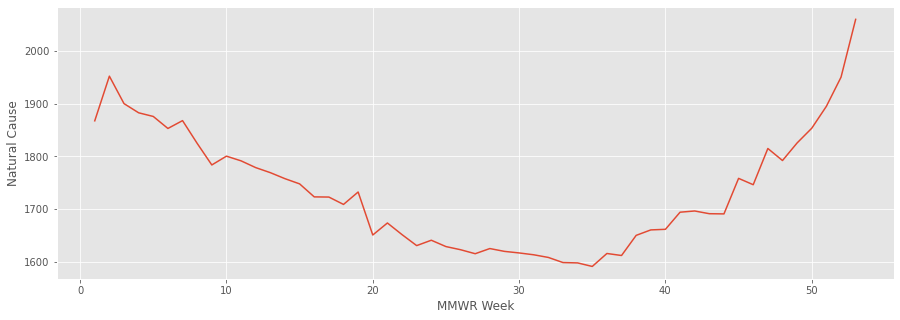

In [44]:
fig, ax = plt.subplots(figsize=(15, 5))
sns.lineplot(x='MMWR Week', y='Natural Cause', data=weekly_2014, ci=None)